# Polarización Inducida

## Caso 2 de inversión

In [1]:
import numpy as np 
import pygimli as pg 
from pygimli.physics import ert 
import pygimli.meshtools as mt
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
data = ert.load("Datos_IP_1.dat")

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1cef31b47f0>)

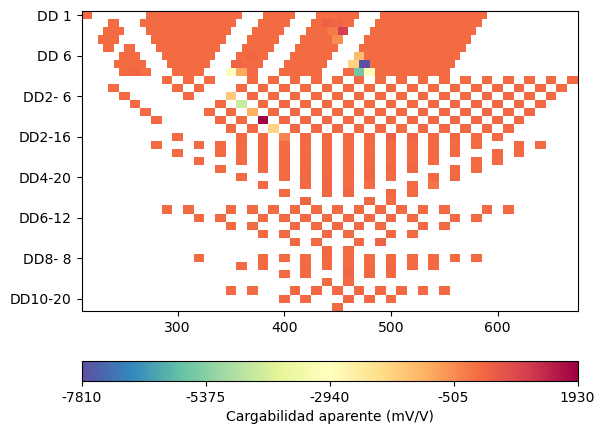

In [4]:
data.show("ip", label = "Cargabilidad aparente (mV/V)") #Tenemos valores de cargabilidad negativos, son demasiados, normalmente sólo son casos puntuales, por lo que toca eliminarlos.

c:\Users\ASUS i5\miniconda3\envs\pg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

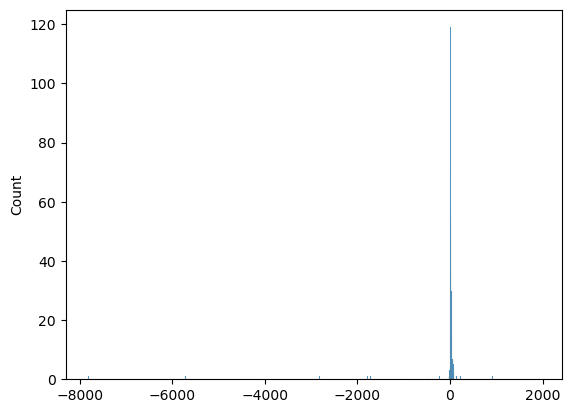

In [5]:
sns.histplot(data["ip"], label= "Cargabilidad aparente (mV/V)")

In [6]:
data.remove(data["ip"] < 0.0)

In [7]:
print(data) #Eran 509 por lo que borró pocos, que es lo indicado.

Data: Sensors: 71 data: 482, nonzero entries: ['a', 'b', 'ip', 'm', 'n', 'r', 'valid']


c:\Users\ASUS i5\miniconda3\envs\pg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

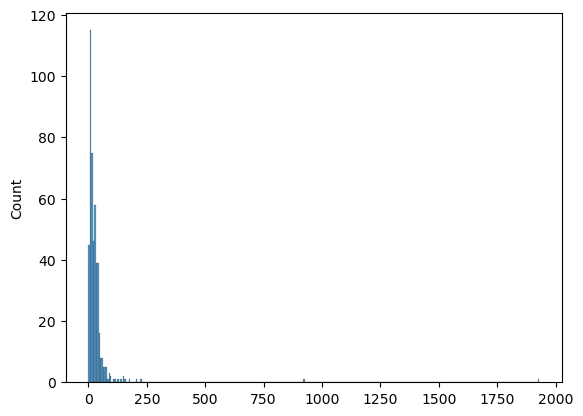

In [8]:
sns.histplot(data["ip"], label= "Cargabilidad aparente (mV/V)")

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1cef7668340>)

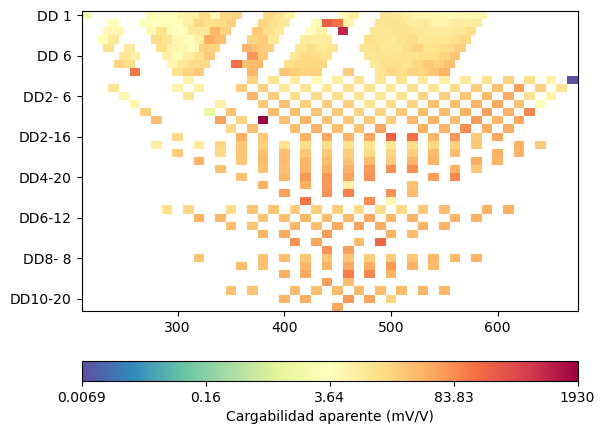

In [9]:
data.show("ip", label = "Cargabilidad aparente (mV/V)") #Aquí tenemos es resistencia, en vez de resistividad

In [10]:
data["k"] = ert.geometricFactor(data)

In [11]:
data["rhoa"] = data("r") * data("k")

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1cef7b4c670>)

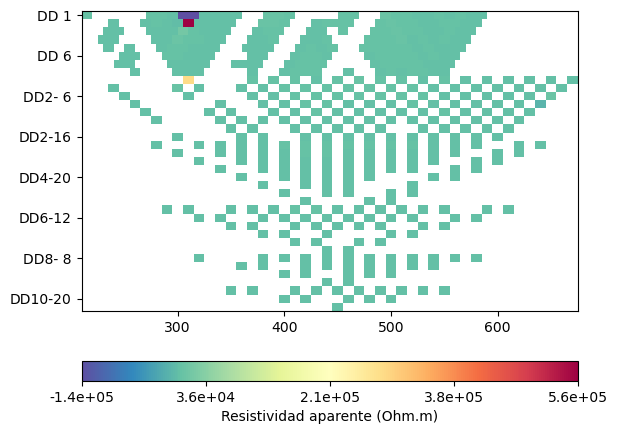

In [12]:
ert.show(data, label="Resistividad aparente (Ohm.m)")

c:\Users\ASUS i5\miniconda3\envs\pg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

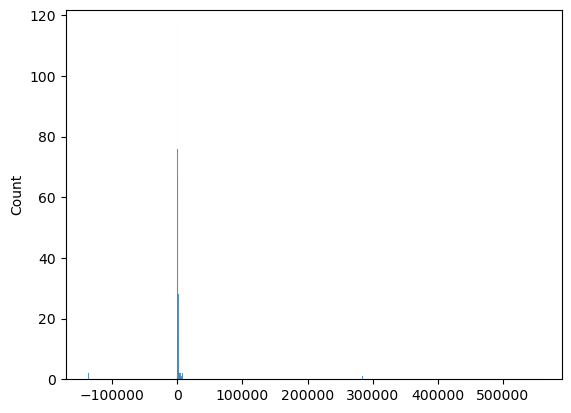

In [13]:
sns.histplot(data["rhoa"], label= "Resistividad aparente (Ohm.m)")

In [14]:
data.remove(data["rhoa"] < 0.0)

In [15]:
print(data)

Data: Sensors: 71 data: 469, nonzero entries: ['a', 'b', 'ip', 'k', 'm', 'n', 'r', 'rhoa', 'valid']


c:\Users\ASUS i5\miniconda3\envs\pg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

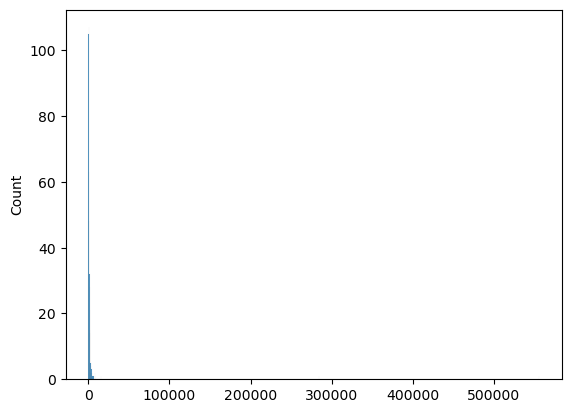

In [16]:
sns.histplot(data["rhoa"], label= "Resistividad aparente (Ohm.m)")

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1cefb411730>)

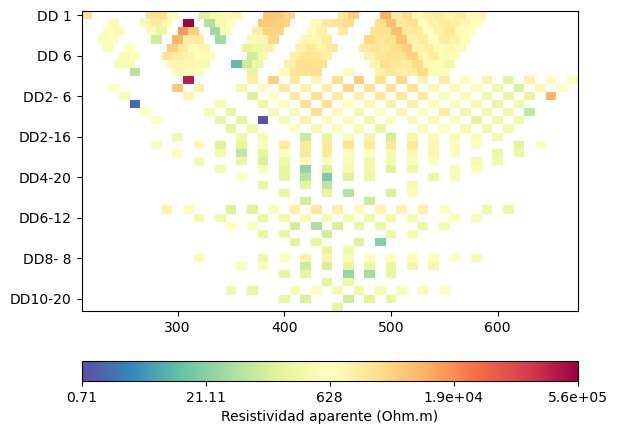

In [17]:
ert.show(data, label="Resistividad aparente (Ohm.m)")

In [18]:
data["err"] = ert.estimateError(data)

In [19]:
data["err"]

469 [0.03000052011419311,...,0.030001816837249905]

In [20]:
mgr1 = ert.ERTIPManager(data)
mgr1.invert(verbose=True)

15/02/24 - 23:28:55 - pyGIMLi - INFO - Found 2 regions.
15/02/24 - 23:28:55 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/02/24 - 23:28:55 - pyGIMLi - INFO - Found 2 regions.
15/02/24 - 23:28:55 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/02/24 - 23:28:55 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/02/24 - 23:28:55 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/02/24 - 23:28:55 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3234 Cells: 6092 Boundaries: 4756
15/02/24 - 23:28:55 - pyGIMLi - INFO - Use median(data values)=637.1149901480102
15/02/24 - 23:28:55 - pyGIMLi - INFO - Created startmodel from forward operator: 1188, min/max=637.114990/637.114990
15/02/24 - 23:28:55 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001CEFB7AD090>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001CEFB7AD180>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001CEFB7AD130>
min/max (data): 0.71/5.6e+05
min/max (error): 3%/3.14%
min/max (start model): 637/637
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1669.04
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  737.84 (dPhi = 55.43%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  521.43 (dPhi = 28.67%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =  218.36 (dPhi = 54.13%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =  175.72 (dPhi = 18.92%) lam: 20.0
------------

15/02/24 - 23:30:02 - pyGIMLi - INFO - Found 1 regions.
15/02/24 - 23:30:02 - pyGIMLi - INFO - Starting inversion.


chi² =   94.47 (dPhi = 0.83%) lam: 20.0
################################################################################
#                Abort criterion reached: dPhi = 0.83 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ipModelling.DCIPMModelling object at 0x000001CEFB765DB0>
Data transformation: <pgcore._pygimli_.RTrans object at 0x000001CEFA470040>
Model transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001CEFB7AD400>
min/max (data): 6.9e-06/1.93
min/max (error): 3.05%/1.5e+04%
min/max (start model): 0.02/0.02
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   86.99
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   33.94 (dPhi = 58.42%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   33.93 (dPhi = -0.09%) lam: 1

(-150.0, 0.0)

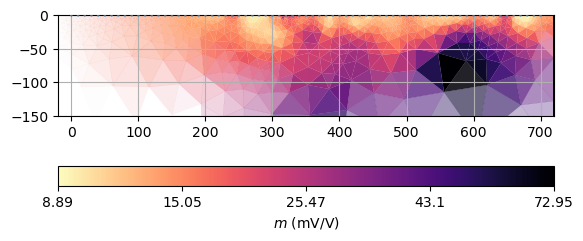

In [21]:
ax, cb = mgr1.showIPModel(ipkw={})
ax.grid(True)
ax.set_ylim([-150, ax.get_ylim()[1]])

(-150.0, 0.0)

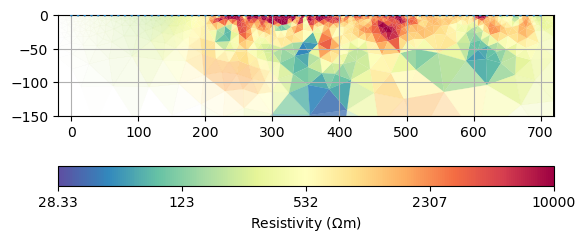

In [22]:
kw = dict(logscale=True, cMax=10000)
ax, cb = mgr1.showResult(**kw)
ax.grid(True)
ax.set_ylim([-150, ax.get_ylim()[1]])

## Refinar inversión
### Esto es debido a que se puede mejorar

In [23]:
data_array_ip = np.array(data["ip"])

In [24]:
data_series_ip = pd.Series(data_array_ip)

In [25]:
percentile_99_ip = data_series_ip.quantile(0.99)
percentile_99_ip

162.35999999999984

In [26]:
percentile_1_ip = data_series_ip.quantile(0.01)
percentile_1_ip

2.8808

In [27]:
data.remove(data["ip"] > percentile_99_ip)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1ceffc93dc0>)

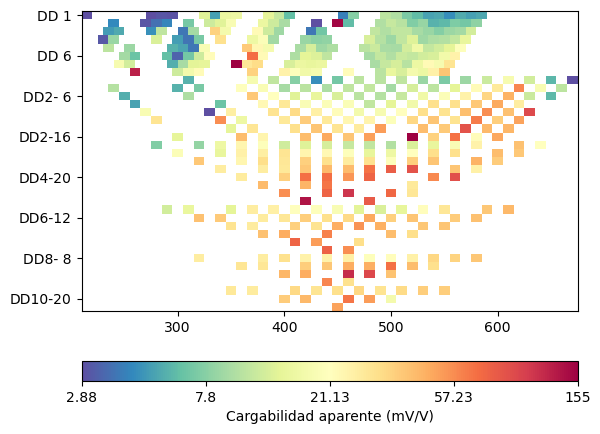

In [28]:
data.show("ip", label = "Cargabilidad aparente (mV/V)", cMin=percentile_1_ip) #cMin no muestra los valores del percentil 0 al 1.

c:\Users\ASUS i5\miniconda3\envs\pg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

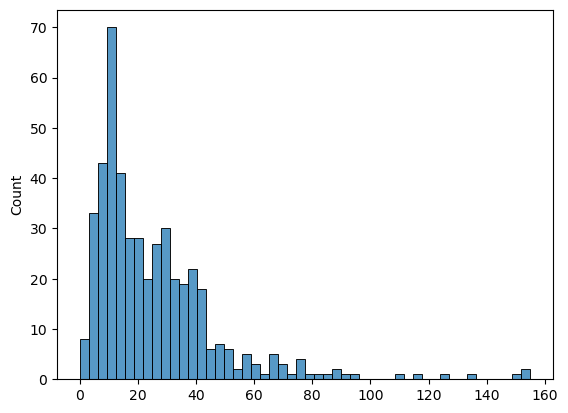

In [29]:
sns.histplot(data["ip"], label= "Cargabilidad aparente (mV/V)", bins=50)

In [30]:
data_array_resistivity = np.array(data["rhoa"])

In [31]:
data_series_resistivity = pd.Series(data_array_resistivity)

In [32]:
quantile_99_resistivity = data_series_resistivity.quantile(0.99)
quantile_1_resistivity = data_series_resistivity.quantile(0.01)

In [33]:
quantile_99_resistivity, quantile_1_resistivity #Es recomendable dejar el percentil_1

(7742.266599212845, 31.26387345146418)

In [34]:
data.remove(data["rhoa"] > quantile_99_resistivity)

c:\Users\ASUS i5\miniconda3\envs\pg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

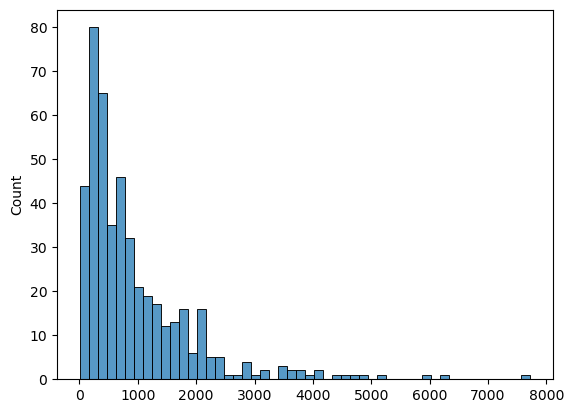

In [35]:
sns.histplot(data["rhoa"], label= "Resistividad aparente (Ohm.m)", bins=50)

In [36]:
mgr1 = ert.ERTIPManager(data)
inv2 = mgr1.invert(verbose=True)

15/02/24 - 23:37:35 - pyGIMLi - INFO - Found 2 regions.
15/02/24 - 23:37:35 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/02/24 - 23:37:35 - pyGIMLi - INFO - Found 2 regions.
15/02/24 - 23:37:35 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/02/24 - 23:37:35 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/02/24 - 23:37:35 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/02/24 - 23:37:35 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3234 Cells: 6092 Boundaries: 4756
15/02/24 - 23:37:35 - pyGIMLi - INFO - Use median(data values)=635.9840167927146
15/02/24 - 23:37:35 - pyGIMLi - INFO - Created startmodel from forward operator: 1188, min/max=635.984017/635.984017
15/02/24 - 23:37:35 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001CE8EDD8770>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001CE8EDD8E50>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001CE8EDD85E0>
min/max (data): 1.34/7728
min/max (error): 3%/3.07%
min/max (start model): 636/636
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1304.74
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  546.63 (dPhi = 57.88%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  215.89 (dPhi = 58.96%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =  171.35 (dPhi = 19.81%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =  164.72 (dPhi = 3.62%) lam: 20.0
----------------

15/02/24 - 23:38:46 - pyGIMLi - INFO - Found 1 regions.
15/02/24 - 23:38:46 - pyGIMLi - INFO - Starting inversion.


chi² =   42.45 (dPhi = -0.90%) lam: 20.0
################################################################################
#                Abort criterion reached: dPhi = -0.9 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ipModelling.DCIPMModelling object at 0x000001CE8EDDE5E0>
Data transformation: <pgcore._pygimli_.RTrans object at 0x000001CE8ED365E0>
Model transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001CE8EDDE4F0>
min/max (data): 6.9e-06/0.15
min/max (error): 3.65%/1.5e+04%
min/max (start model): 0.02/0.02
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   78.67
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   28.53 (dPhi = 61.30%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   28.62 (dPhi = -0.47%) lam: 

(-150.0, 0.0)

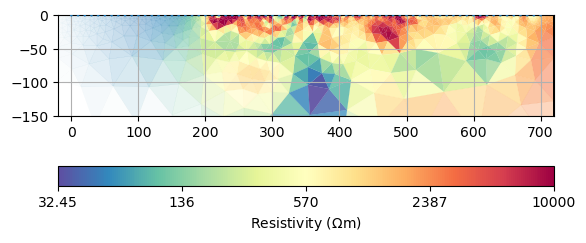

In [37]:
kw = dict(logscale=True, cMax=10000) #Interesante perforar entre 300 y 400
ax, cb = mgr1.showResult(**kw)
ax.grid(True)
ax.set_ylim([-150, ax.get_ylim()[1]])

(-150.0, 0.0)

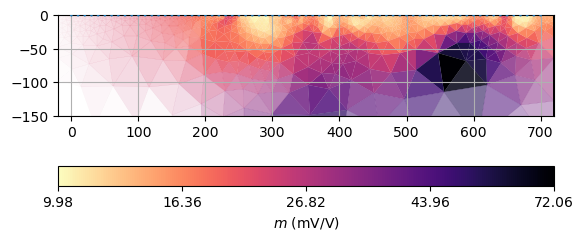

In [38]:
ax, cb = mgr1.showIPModel(ipkw={})
ax.grid(True)
ax.set_ylim([-150, ax.get_ylim()[1]])

array([<Axes: >, <Axes: >], dtype=object)

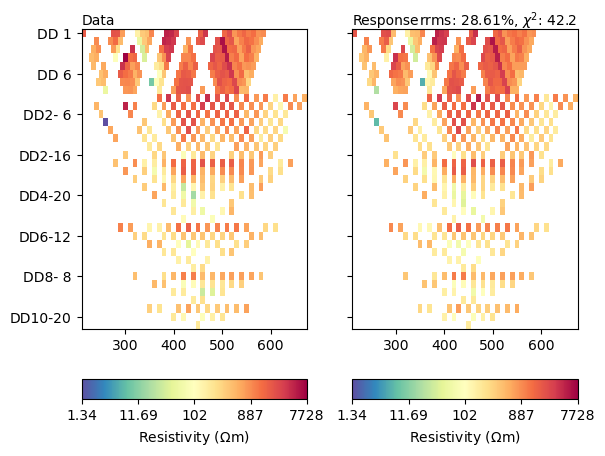

In [67]:
mgr1.showFit()